<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E8%96%88%E8%90%83%E5%BC%8F%E5%AD%B8%E7%BF%92/Stacking%E7%AF%84%E4%BE%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%pip install wget

In [2]:
#下載字型
import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

'ChineseFont.ttf'

中文字型已設定為 'ChineseFont'
基礎學習器 - 邏輯回歸 Accuracy: 0.8067, ROC-AUC: 0.8936
基礎學習器 - 決策樹 Accuracy: 0.7733, ROC-AUC: 0.7811
堆疊分類器 (Stacking) Accuracy: 0.8167, ROC-AUC: 0.9037

圖表已儲存為: stacking_model_performance_comparison.png


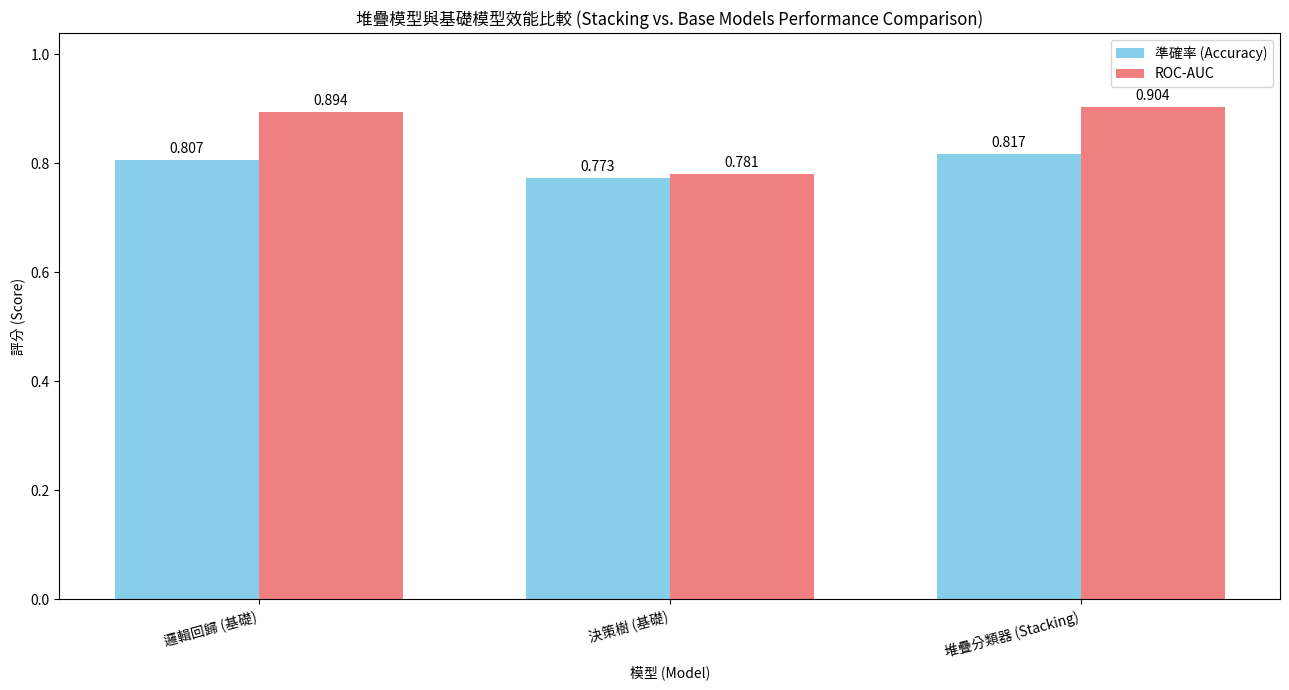

In [ ]:
# --- 1. 套件匯入 ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification # 僅為範例數據，請替換
from sklearn.metrics import accuracy_score, roc_auc_score

# 基礎學習器範例 (請替換成您使用的模型)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC # 也可作為基礎學習器或元學習器

# Stacking 分類器
from sklearn.ensemble import StackingClassifier

# 繪圖相關
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager

# --- 2. 中文字型設定 ---
# 假設您已在筆記本前面儲存格成功下載並使 fontManager 知道 "ChineseFont.ttf"
# 例如，您可能已經執行過：

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont") # 直接設定使用已添加的字型
print("中文字型已設定為 'ChineseFont'")

# --- 3. 數據準備與模型訓練評估 (請修改此部分以符合您的 Stacking 範例) ---

# 3.1 載入與準備數據 (範例，請替換)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3.2 初始化用於儲存模型效能的列表
model_names_plot = []
accuracies_plot = []
roc_aucs_plot = []

# 3.3 定義、訓練並評估基礎學習器 (Base Learners)
#     您需要為您的每個基礎學習器重複此過程

# 基礎學習器 1: 邏輯回歸 (範例)
base_lr = LogisticRegression(solver='liblinear', random_state=42)
base_lr.fit(X_train, y_train)
lr_pred = base_lr.predict(X_test)
lr_proba = base_lr.predict_proba(X_test)[:, 1]
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_roc_auc = roc_auc_score(y_test, lr_proba)
model_names_plot.append('邏輯回歸 (基礎)')
accuracies_plot.append(lr_accuracy)
roc_aucs_plot.append(lr_roc_auc)
print(f"基礎學習器 - 邏輯回歸 Accuracy: {lr_accuracy:.4f}, ROC-AUC: {lr_roc_auc:.4f}")

# 基礎學習器 2: 決策樹 (範例)
base_dt = DecisionTreeClassifier(max_depth=5, random_state=42)
base_dt.fit(X_train, y_train)
dt_pred = base_dt.predict(X_test)
dt_proba = base_dt.predict_proba(X_test)[:, 1]
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_roc_auc = roc_auc_score(y_test, dt_proba)
model_names_plot.append('決策樹 (基礎)')
accuracies_plot.append(dt_accuracy)
roc_aucs_plot.append(dt_roc_auc)
print(f"基礎學習器 - 決策樹 Accuracy: {dt_accuracy:.4f}, ROC-AUC: {dt_roc_auc:.4f}")

# (可以繼續添加更多基礎學習器的訓練與評估...)
# 例如:
# base_svc = SVC(probability=True, random_state=42)
# base_svc.fit(X_train, y_train)
# svc_pred = base_svc.predict(X_test)
# svc_proba = base_svc.predict_proba(X_test)[:, 1]
# svc_accuracy = accuracy_score(y_test, svc_pred)
# svc_roc_auc = roc_auc_score(y_test, svc_proba)
# model_names_plot.append('SVM (基礎)')
# accuracies_plot.append(svc_accuracy)
# roc_aucs_plot.append(svc_roc_auc)
# print(f"基礎學習器 - SVM Accuracy: {svc_accuracy:.4f}, ROC-AUC: {svc_roc_auc:.4f}")


# 3.4 定義 Stacking 分類器的基礎學習器列表和元學習器
#     這裡我們使用上面已經實例化的 base_lr 和 base_dt
estimators = [
    ('lr', base_lr), # 可以直接使用已訓練的模型，或重新定義
    ('dt', base_dt)  # StackingClassifier 內部會對它們進行 clone 和 refit
    # ('svc', base_svc) # 如果您有更多基礎學習器
]
# 元學習器 (Meta-Learner) - 範例：使用一個新的邏輯回歸
meta_learner = LogisticRegression(solver='liblinear', random_state=42)

# 3.5 初始化並訓練 Stacking 分類器
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_learner,
    cv=5 # 交叉驗證用於生成元特徵
)
stacking_clf.fit(X_train, y_train)

# 3.6 評估 Stacking 分類器
stacking_pred = stacking_clf.predict(X_test)
stacking_proba = stacking_clf.predict_proba(X_test)[:, 1]
stacking_accuracy = accuracy_score(y_test, stacking_pred)
stacking_roc_auc = roc_auc_score(y_test, stacking_proba)
model_names_plot.append('堆疊分類器 (Stacking)')
accuracies_plot.append(stacking_accuracy)
roc_aucs_plot.append(stacking_roc_auc)
print(f"堆疊分類器 (Stacking) Accuracy: {stacking_accuracy:.4f}, ROC-AUC: {stacking_roc_auc:.4f}")


# --- 4. 繪製效能比較圖表 ---
# model_names_plot, accuracies_plot, roc_aucs_plot 已經在上面收集完畢

plt.figure(figsize=(10 + len(model_names_plot), 7)) # 根據模型數量動態調整寬度
bar_width = 0.35  # 長條的寬度
index = np.arange(len(model_names_plot))  # 模型數量的索引

# 繪製準確率長條
rects1 = plt.bar(index, accuracies_plot, bar_width, label='準確率 (Accuracy)', color='skyblue')
# 繪製ROC-AUC長條 (在準確率長條旁邊)
rects2 = plt.bar(index + bar_width, roc_aucs_plot, bar_width, label='ROC-AUC', color='lightcoral')

plt.xlabel('模型 (Model)')
plt.ylabel('評分 (Score)')
plt.title('堆疊模型與基礎模型效能比較 (Stacking vs. Base Models Performance Comparison)')
plt.xticks(index + bar_width / 2, model_names_plot, rotation=15, ha="right") # X軸標籤設定
plt.ylim(0, max(max(accuracies_plot, default=0), max(roc_aucs_plot, default=0)) * 1.15 if accuracies_plot or roc_aucs_plot else 1.05) # 動態調整Y軸上限
plt.legend() # 顯示圖例

# 在長條圖上方顯示數值
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',  # 格式化數值到小數點後三位
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3點的垂直位移
                    textcoords="offset points",
                    ha='center', va='bottom')

ax = plt.gca() # Get current axes
autolabel(rects1, ax)
autolabel(rects2, ax)

plt.tight_layout()  # 自動調整子圖參數

# --- 5. 儲存並顯示圖表 ---
chart_filename = 'stacking_model_performance_comparison.png'
plt.savefig(chart_filename)
print(f"\n圖表已儲存為: {chart_filename}")
plt.show()
